# Arbol de Clasificación 

7. Elabore un árbol de clasificación utilizando la variable respuesta que creó en el punto
anterior. Explique los resultados a los que llega. Muestre el modelo gráficamente. Recuerde
que la nueva variable respuesta es categórica, pero se generó a partir de los precios de las
casas, no incluya el precio de venta para entrenar el modelo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.compose import make_column_selector as selector
from sklearn import metrics
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv("train.csv")

numerical_columns = ['SalePrice' ,'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'KitchenAbvGr', 'Fireplaces']
df = df[numerical_columns]

df.describe()

SalePrice  OverallQual    GrLivArea   GarageCars  TotalBsmtSF  \
count    1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   180921.195890     6.099315  1515.463699     1.767123  1057.429452   
std     79442.502883     1.382997   525.480383     0.747315   438.705324   
min     34900.000000     1.000000   334.000000     0.000000     0.000000   
25%    129975.000000     5.000000  1129.500000     1.000000   795.750000   
50%    163000.000000     6.000000  1464.000000     2.000000   991.500000   
75%    214000.000000     7.000000  1776.750000     2.000000  1298.250000   
max    755000.000000    10.000000  5642.000000     4.000000  6110.000000   

          1stFlrSF    YearBuilt  KitchenAbvGr   Fireplaces  
count  1460.000000  1460.000000   1460.000000  1460.000000  
mean   1162.626712  1971.267808      1.046575     0.613014  
std     386.587738    30.202904      0.220338     0.644666  
min     334.000000  1872.000000      0.000000     0.000000  
25%     882.000000  1954.000000      1.000000     0.000000  
50%    1087.000000  1973.000000      1.000000     1.000000  
75%    1391.250000  2000.000000      1.000000     1.000000  
max    4692.000000  2010.000000      3.000000     3.000000

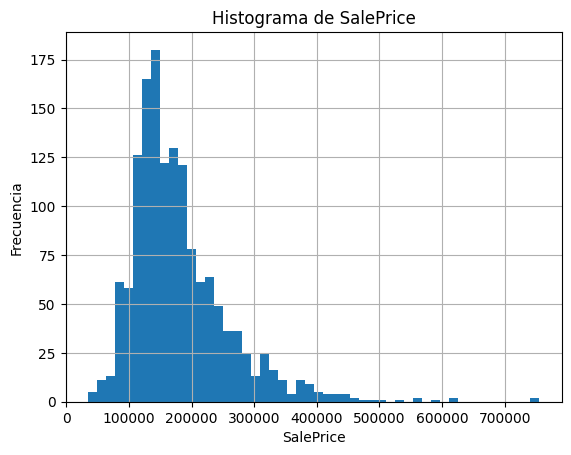

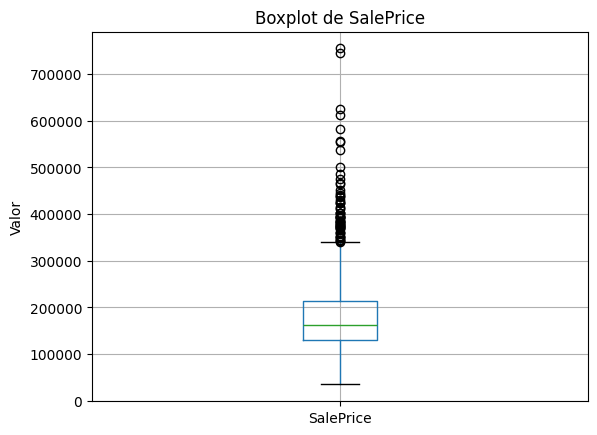

In [3]:
# Histograma de SalePrice
df['SalePrice'].hist(bins=50)
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')
plt.title('Histograma de SalePrice')
plt.show()

# Boxplot de SalePrice
df.boxplot(column='SalePrice')
plt.title('Boxplot de SalePrice')
plt.ylabel('Valor')
plt.show()

In [4]:
per1 = df['SalePrice'].quantile(0.25)
per2 = df['SalePrice'].quantile(0.75)

def price_tag(price: float) -> str:
    if price <= per1:
        return "Económica"
    elif price <= per2:
        return "Intermedia"
    else:
        return "Cara"

df['CategoriaPrecio'] = df['SalePrice'].apply(price_tag)
print(df['CategoriaPrecio'].value_counts())


CategoriaPrecio
Intermedia    733
Económica     365
Cara          362
Name: count, dtype: int64


In [5]:
df.groupby('CategoriaPrecio')['SalePrice'].describe()


count           mean           std       min       25%  \
CategoriaPrecio                                                           
Cara             362.0  288619.552486  78510.581981  214500.0  235000.0   
Económica        365.0  105831.594521  19890.974241   34900.0   93000.0   
Intermedia       733.0  165124.332879  23345.833972  130000.0  144000.0   

                      50%       75%       max  
CategoriaPrecio                                
Cara             264780.5  316900.0  755000.0  
Económica        110000.0  121000.0  129900.0  
Intermedia       163000.0  183500.0  214000.0

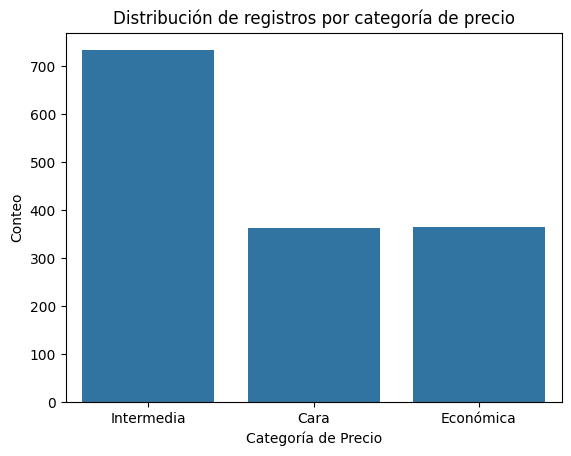

In [6]:
sns.countplot(x='CategoriaPrecio', data=df)
plt.title("Distribución de registros por categoría de precio")
plt.xlabel("Categoría de Precio")
plt.ylabel("Conteo")
plt.show()

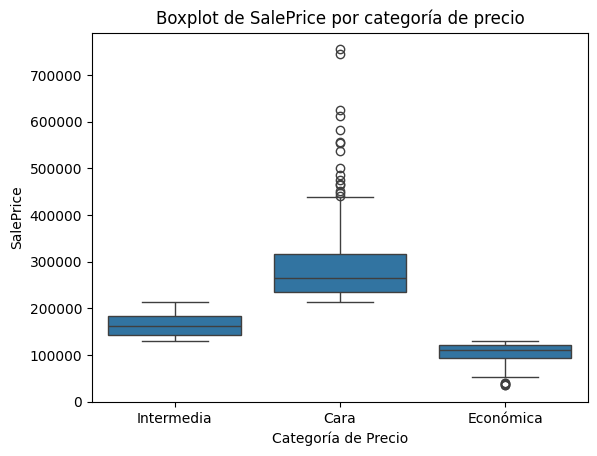

In [7]:
sns.boxplot(x='CategoriaPrecio', y='SalePrice', data=df)
plt.title("Boxplot de SalePrice por categoría de precio")
plt.xlabel("Categoría de Precio")
plt.ylabel("SalePrice")
plt.show()

Se decidio usar los cuartiles de 25 y 75 como puntos de corte porque así se refleja de forma más clara la dispersión natural de los precios y se tienen en cuenta los valores atípicos de la cola alta de la distribución. Con esta aproximación, la categoría “Económica” recoge el 25% de las casas con precios más bajos, la categoría “Intermedia” agrupa el rango central (entre el 25% y el 75%) y la categoría “Cara” se concentra en el 25% de los precios más elevados. De esta forma, se pueden comparar mejor las diferencias entre los grupos debido a la distribución de datos. 

8. Utilice el modelo con el conjunto de prueba y determine la eficiencia del algoritmo para
clasificar.

In [8]:
columns_to_use = [ 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'KitchenAbvGr', 'Fireplaces' ]
class_names = ["Económica", "Intermedia", "Cara"]

X = df[columns_to_use]
Y = df['CategoriaPrecio']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Class_tree = DecisionTreeClassifier(random_state=42)

Class_tree.fit(X_train, y_train)

y_pred = Class_tree.predict(X_test)

print(f"Precisión: {accuracy_score(y_test, y_pred):.2f}")

Precisión: 0.73


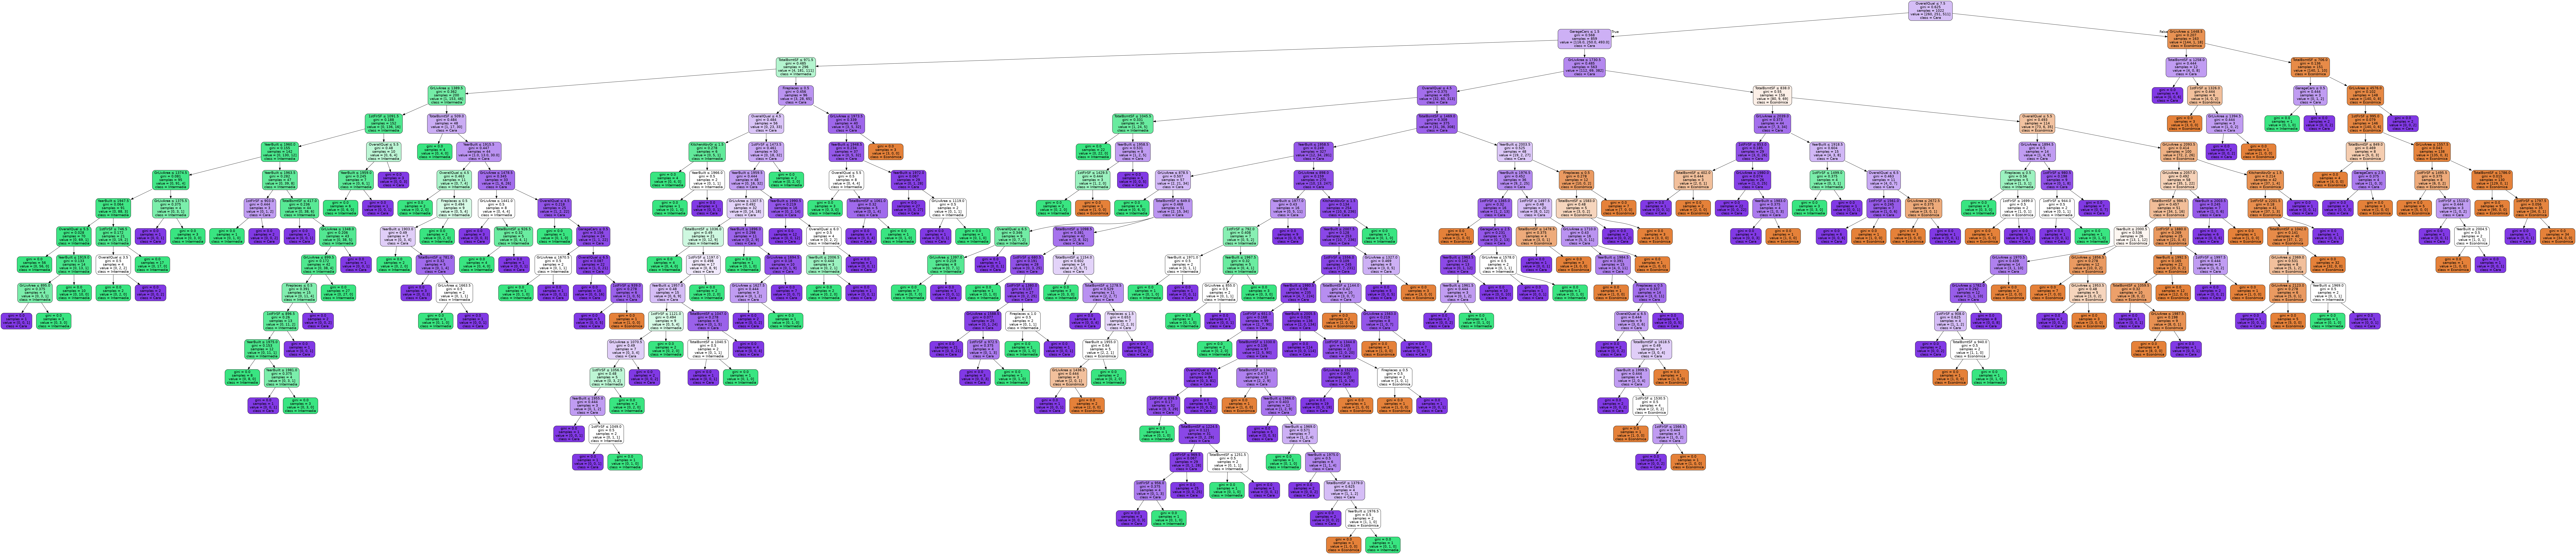

In [9]:
dot_data = StringIO()
export_graphviz(
    Class_tree,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=columns_to_use,
    class_names=class_names
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("tree.png")
Image(graph.create_png())

9. Haga un análisis de la eficiencia del algoritmo usando una matriz de confusión para el árbol
de clasificación. Tenga en cuenta la efectividad, donde el algoritmo se equivocó más, donde
se equivocó menos y la importancia que tienen los errores.

In [10]:
print("Analisis de Eficiencia con el reporte de clasificación:")
print(classification_report(y_test, y_pred))




Analisis de Eficiencia con el reporte de clasificación:
              precision    recall  f1-score   support

        Cara       0.81      0.75      0.78       102
   Económica       0.67      0.72      0.69       114
  Intermedia       0.74      0.73      0.74       222

    accuracy                           0.73       438
   macro avg       0.74      0.73      0.73       438
weighted avg       0.74      0.73      0.73       438



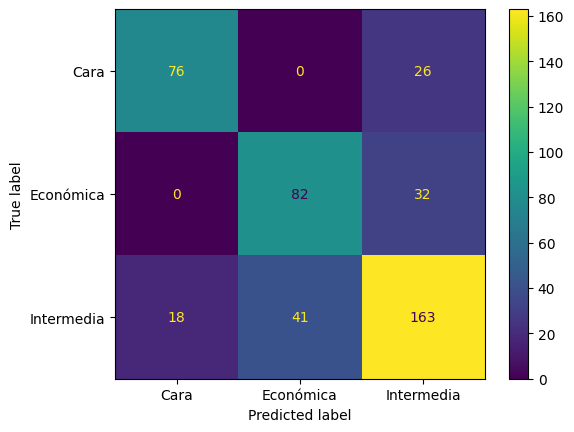

In [11]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Class_tree.classes_)
disp.plot()
plt.show()

El arbol de clasificación logra una precisión global de 0.73, lo que indica un desempeño razonable en la categorización de las casas. Observando la matriz de confusión, se ve que la mayor parte de los errores provienen de confundir la categoría “Intermedia” tanto con “Económica” como con “Cara”. Es decir, varias casas realmente “Intermedias” son clasificadas como “Económicas” o “Caras”, y viceversa en menor medida. No obstante, la categoría “Cara” presenta buena precisión (0.81), aunque su recall algo menor (0.75) implica que algunas propiedades costosas se etiquetan como “Intermedias”. En el caso de “Económica”, los errores también se concentran al confundirla con “Intermedia”, lo que sugiere que la frontera entre precios bajos y medios puede no estar totalmente clara con los atributos utilizados. Estos fallos pueden impactar el análisis al subestimar o sobrestimar el valor de ciertas casas, por lo que se podria mejorar verificando que variables remover o añadir para mejorar el rendimiento de predicción.  

10. Entrene un modelo usando validación cruzada, prediga con él. ¿le fue mejor que al modelo
anterior?

In [12]:
clf_cv = DecisionTreeClassifier(random_state=42)

scores = cross_val_score(clf_cv, X, Y, cv=5, scoring='accuracy')
print(f"Puntajes obtenidos en cada fold: {scores}")
print(f"Precisión media (CV=5): {scores.mean():.2f}")

y_pred_cv = cross_val_predict(clf_cv, X, Y, cv=5)

Puntajes obtenidos en cada fold: [0.75684932 0.71917808 0.76712329 0.75684932 0.78424658]
Precisión media (CV=5): 0.76


La validación cruzada arrojó una precisión media de 0.76, ligeramente superior a la del modelo anterior (0.73). Esto indica que, en promedio, el árbol de decisión generaliza un poco mejor cuando se evalúa con varias particiones de los datos en lugar de usar solo un único conjunto de entrenamiento y prueba. La diferencia se debe a que, en la validación cruzada, el modelo se entrena y evalúa repetidamente en distintos subconjuntos, lo que reduce la posibilidad de que un resultado quede sesgado por la selección específica de un solo conjunto de entrenamiento y prueba. Por tanto, sí le fue mejor que al modelo anterior bajo este método de evaluación.

11. Haga al menos, 3 modelos más, cambiando la profundidad del árbol. ¿Cuál funcionó mejor?

In [13]:
# Ejemplos de modelos con distintas profundidades
model_depth3 = DecisionTreeClassifier(max_depth=3, random_state=42)
model_depth5 = DecisionTreeClassifier(max_depth=5, random_state=42)
model_depth7 = DecisionTreeClassifier(max_depth=7, random_state=42)

for model in [model_depth3, model_depth5, model_depth7]:
    scores = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    print(f"Modelo con max_depth={model.max_depth}")
    print(f"  Exactitud en cada fold: {scores}")
    print(f"  Precisión media (CV=5): {scores.mean():.2f}\n")

Modelo con max_depth=3
  Exactitud en cada fold: [0.72260274 0.72945205 0.76027397 0.74315068 0.68835616]
  Precisión media (CV=5): 0.73

Modelo con max_depth=5
  Exactitud en cada fold: [0.76369863 0.75       0.77054795 0.76712329 0.77054795]
  Precisión media (CV=5): 0.76

Modelo con max_depth=7
  Exactitud en cada fold: [0.76027397 0.74657534 0.75684932 0.79109589 0.79794521]
  Precisión media (CV=5): 0.77



In [14]:
depths = [3, 5, 7]
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Profundidad máxima = {depth}: Exactitud en test = {accuracy:.2f}")

Profundidad máxima = 3: Exactitud en test = 0.71
Profundidad máxima = 5: Exactitud en test = 0.77
Profundidad máxima = 7: Exactitud en test = 0.76


En la validación cruzada, la precisión media va aumentando conforme crece la profundidad (0.73 con max_depth=3, 0.76 con max_depth=5 y 0.77 con max_depth=7), lo que sugiere que un árbol más profundo puede capturar mejor la complejidad de los datos. Sin embargo, al evaluar en el conjunto de prueba, el árbol con max_depth=5 alcanzó la mejor exactitud (0.77), mientras que el de max_depth=7 quedó ligeramente por debajo (0.76). Esto indica que, si bien aumentar la profundidad puede mejorar la capacidad de aprendizaje, un árbol demasiado profundo tiende a sobreajustar y no siempre obtiene el mejor rendimiento al generalizar en datos nuevos. Por tanto, el modelo con max_depth=5 se perfila como el más equilibrado entre ajuste y generalización.

12. Repita los análisis usando random forest como algoritmo de predicción, explique sus
resultados comparando ambos algoritmos.


In [17]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


scores_rf = cross_val_score(rf_model, X, Y, cv=5, scoring='accuracy')
print(f"Puntajes obtenidos en cada fold de RF: {scores_rf}")
print(f"Precisión media (CV=5) RF: {scores_rf.mean():.2f}")


y_pred_cv_rf = cross_val_predict(rf_model, X, Y, cv=5)
print("\nReporte de clasificación (Random Forest con CV):")
print(classification_report(Y, y_pred_cv_rf))



rf_model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Precisión del Random Forest en test: {acc_rf:.2f}")

Puntajes obtenidos en cada fold de RF: [0.81849315 0.81506849 0.8390411  0.81506849 0.82534247]
Precisión media (CV=5) RF: 0.82

Reporte de clasificación (Random Forest con CV):
              precision    recall  f1-score   support

        Cara       0.87      0.83      0.85       362
   Económica       0.80      0.78      0.79       365
  Intermedia       0.81      0.84      0.83       733

    accuracy                           0.82      1460
   macro avg       0.83      0.82      0.82      1460
weighted avg       0.82      0.82      0.82      1460

Precisión del Random Forest en test: 0.82
